<a href="https://colab.research.google.com/github/nicoletology/Python_101/blob/main/TP061817_Lab_3_Task_1_Model_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case Study: Online Shopper Data Preparation

Session: Lab3\
Date: 5 October 2021

Aim: Evaluate the predictive performance of baseline Sequential NN. 

Objectives:
1. To perform model predictions.
2. To compute evaluation metrics.
3. To draw and save performance plots.
4. To analyse the performance of model. 


[Data Set](https://www.kaggle.com/henrysue/online-shoppers-intention):\
This is a preprocessed dataset. Some of the variables are dropped. All variables are converted to numeric. Revenue is the target variable. It is a factorial variable converted to numeric. This is a classification problem.


## 1. Data Preparation


In [ ]:
#Import the Dependencies
import pandas as pd #data wrangling
import numpy as np #for scientific computing
from sklearn.model_selection import train_test_split
import seaborn as sns #for visualisation
import matplotlib.pyplot as plt #for visualisation
import tensorflow as tf # for deep learning
import keras #high level API for Deep Learning

keras.backend.clear_session()

In [ ]:
#Configuring the Dataset view
pd.set_option('display.max_rows', 50) 
pd.set_option('display.max_columns', 100) 
pd.set_option('display.width', 1000)

In [ ]:
train_full = pd.read_csv('https://raw.githubusercontent.com/nicoletology/Dataset-for-DL-lab/main/online_shop_train.csv?token=ASQOLHRAYPJMR6XDE657W33BMWSMY')
test = pd.read_csv('https://raw.githubusercontent.com/nicoletology/Dataset-for-DL-lab/main/online_shop_test.csv?token=ASQOLHUD54SP7MZ4MFB5LDLBMWLJI')


In [ ]:
train_full.shape

(16626, 13)

In [ ]:
test.shape

(2466, 13)

VisitorType0 & VisitorType1 are one-hot encoded variables, so the datatype should be integer instead of float.

In [ ]:
# Changing the data types of VisitorType0 & VisitorType1 
train_full.VisitorType0 = train_full.VisitorType0.astype(int)
train_full.VisitorType1 = train_full.VisitorType0.astype(int)

In [ ]:
train_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16626 entries, 0 to 16625
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Administrative  16626 non-null  int64  
 1   Informational   16626 non-null  int64  
 2   ProductRelated  16626 non-null  int64  
 3   ExitRates       16626 non-null  float64
 4   PageValues      16626 non-null  float64
 5   SpecialDay      16626 non-null  float64
 6   Month           16626 non-null  int64  
 7   Region          16626 non-null  int64  
 8   TrafficType     16626 non-null  int64  
 9   VisitorType0    16626 non-null  int64  
 10  VisitorType1    16626 non-null  int64  
 11  Weekend         16626 non-null  int64  
 12  Revenue         16626 non-null  int64  
dtypes: float64(3), int64(10)
memory usage: 1.6 MB


The data types of VisitorType0 & VisitorType1 are corrected. 

## 2. Model Building
### i. Data Preparation 
- Train-Val Split
- Define X, y Variables

**Train-Test Split - Stratified Sampling**
using [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) functions

Parameters: arrays, test_size, train_size, random_state, shuffle, stratify\
*By default, the sampling is stratified as long as the random state is specified.*

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# train-test split
train_stratified, val_stratified = train_test_split(train_full, test_size = 0.20, random_state = 0)

**Define Variables - X, y**

We have 3 datasets:
1. train_stratified
2. val_stratified
3. test

Thus, we need to assign 6 Objects (3 datasets into X and y).

In [ ]:
#Define the input and target variables for train_stratified Dataset
X_train = train_stratified.iloc[:,:-1] #numpy function for subsetting the variables
y_train = train_stratified.iloc[:,-1]

In [ ]:
#Define the input and target variables for Training Dataset
X_val = val_stratified.iloc[:,:-1] #numpy function for subsetting the variables
y_val = val_stratified.iloc[:,-1]

In [ ]:
#Define the input and target variables for Testing Dataset
X_test = test.iloc[:,:-1] #select all columns from 0 except the last colomn
y_test = test.iloc[:,-1] #select only the last colomn

In [ ]:
#Define the input and target variables for Training Dataset
X_train_full = train_full.iloc[:,:-1] #numpy function for subsetting the variables
y_train_full = train_full.iloc[:,-1]

In [ ]:
X_test.head()

,Administrative,Informational,ProductRelated,ExitRates,PageValues,SpecialDay,Month,Region,TrafficType,VisitorType0,VisitorType1,Weekend
0,0,0,15,0.014286,14.554286,0.0,5,3,2,0.0,1.0,0
1,1,0,6,0.028571,38.273312,0.0,7,1,4,0.0,0.0,0
2,2,2,19,0.031677,15.527034,0.0,11,4,2,0.0,1.0,0
3,16,0,52,0.018264,0.000000,0.0,5,1,2,0.0,1.0,0
4,0,0,52,0.032692,0.000000,1.0,5,7,6,0.0,1.0,1


In [ ]:
y_test.head()

0    1
1    1
2    1
3    0
4    0
Name: Revenue, dtype: int64

In [ ]:
y_train_full.shape

(16626,)

### ii. Data Processing - Data Type of Target Variable

**One Hot Encode Target Variable For Classification**\
To use Keras for classification problem, 
- if we have multiclass target variable (more than 2 classes), it is necessary to treat the variable with *One-Hot Encoding* before modelling. 
- if we have 2-class target variable, it is not necessary to convert the target variable to categorical. Instead, we can use *binary cross entropy* at *compiling* stage


In [ ]:
# Sample Code for Onehot Encoding
y_train_full_encode = tf.keras.utils.to_categorical(y_train_full, num_classes=None, dtype="int")

In [ ]:
y_train_full_encode.shape

(16626, 2)

In [ ]:
y_train_full_encode[0:5] #showing the one hot encoded values as array

array([[1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0]])

In [ ]:
# Onehot Encoding
y_train_encode = tf.keras.utils.to_categorical(y_train, num_classes=None, dtype="int")
y_val_encode = tf.keras.utils.to_categorical(y_val, num_classes=None, dtype="int")
y_test_encode =  tf.keras.utils.to_categorical(y_test, num_classes=None, dtype="int")

In [ ]:
y_test_encode

array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]])

### iii. Create a Baseline Sequential Network using Keras Process Flow

Sequential model is the simplest kind of Keras Model for Neural Networks. \
It consists of a single stack of layers, connected sequentially. 



In [ ]:
import tensorflow as tf # Python API for deep learning

In [ ]:
tf.__version__ #checking the version of TensorFlow

'2.6.0'

In [ ]:
import keras #high level API for Deep Learning

In [ ]:
keras.__version__ # checking version of keras

'2.6.0'

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model

**Keras Step 1 : Define Network**
1. Add a [Dense](https://keras.io/api/layers/core_layers/dense/) hidden layer with 512 neurons.
2. Add [Layer weight initializer](https://keras.io/api/layers/initializers/): 
- it will use he_uniform initializer - variance scaling initializer. It draws samples from a uniform distribution within [-limit, limit], where limit = sqrt(6 / fan_in) (fan_in is the number of input units in the weight tensor).
3. Add [Layer activation function](https://keras.io/api/layers/activations/)
- it will use ReLU activation function - rectified linear unit activation function. With default values, this returns the standard ReLU activation: max(x, 0), the element-wise maximum of 0 and the input tensor.
- Output layer will use Softmax activation function (because the classes are exclusive.



In [ ]:
def create_baseline():
    #Initializing Neural Network
    classifier = Sequential()

    ## STEP 1: Defining the architecture of ANN
    # First layer 
    # dim = 12 because we have 12 variables (only applicable to first layer)
    classifier.add(Dense(units = 512, kernel_initializer = 'he_uniform', activation = 'relu', input_dim = 12)) 
    # Second layer
    classifier.add(Dense(units= 128 , kernel_initializer = 'he_uniform', activation = 'relu'))
    # Third layer
    classifier.add(Dense(units= 96, kernel_initializer = 'he_uniform', activation = 'relu'))
    # Adding the output layer
    classifier.add(Dense(units = 2, kernel_initializer = 'he_uniform', activation = 'softmax'))
    
    return classifier

#model = create_baseline()
model1a = create_baseline()
model1b = create_baseline()
print(model1a.summary())
#plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               6656      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_2 (Dense)              (None, 96)                12384     
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 194       
Total params: 84,898
Trainable params: 84,898
Non-trainable params: 0
_________________________________________________________________
None


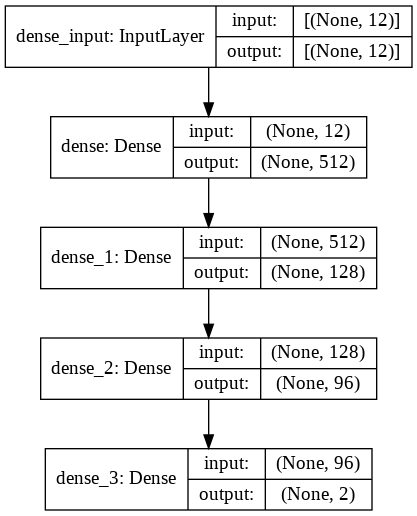

In [ ]:
plot_model(model1a, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

**Keras Step 2 : Compile Network**
1. Add [optimizers](https://keras.io/api/optimizers/). 
2. Add [losses](https://keras.io/api/losses/). The purpose of loss functions is to compute the quantity that a model should seek to minimize during training.
3. Add [metrics](https://keras.io/api/metrics/). A metric is a function that is used to judge the performance of your model. Metric functions are similar to loss functions, except that the results from evaluating a metric are not used when training the model. Note that you may use any loss function as a metric.

In [ ]:
## STEP 2: Compiling Neural Network
# specifying optimizer 
# This is the metaparameter, specfiying the metaparameter , (adam is popular optimizer like SGD, and GD, 
# the binary_corssentropy is because it has 2 class)
#model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model1a.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model1b.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])



**Keras Step 3 : [Fit](https://keras.io/api/models/model_training_apis/) Network**

Experiment:
- use Keras inbuilt train-validation split (non-stratified)
- use manual train-validation split (stratified)



In [ ]:
#Sample Code
#validation split - internal validation split of 20%. In this the last 20% of the rows are used for 
#epochs - 50
#model.fit(X_train_full,y_train_full_encode, validation_split=0.2, epochs=50)

In [ ]:
keras.backend.clear_session()
import numpy as np

In [ ]:
#use Keras inbuilt train-validation split (non-stratified)
SeqNN_1a = model1a.fit(X_train_full, y_train_full_encode, validation_split=0.2, epochs = 50,  batch_size = 32, verbose = 0)

#display the max accuracy and loss
acc_train = SeqNN_1a.history['accuracy']
max_acc_train = max(acc_train)

loss_train = SeqNN_1a.history['loss']
min_loss_train = min(loss_train)

print("Network Performance:")
print("Best Accuracy - %.2f " % (max_acc_train*100),'%')
print("Best Loss - %.2f " % (min_loss_train*100),'%')

#display the best validation network performance
acc_val = SeqNN_1a.history['val_accuracy']
max_acc_val = max(acc_val)

loss_val = SeqNN_1a.history['val_loss']
min_loss_val = min(loss_val)

print("Best Validation Accuracy - %.2f " % (max_acc_val*100),'%')
print("Best Validation Loss - %.2f " % (min_loss_val*100),'%')

#Evaluate network on test data
print("Evaluate on test data")
results = model1a.evaluate(X_test, y_test_encode, batch_size=32)
print("test loss, test acc: " , results)


Network Performance:
Best Accuracy - 87.32  %
Best Loss - 29.14  %
Best Validation Accuracy - 90.59  %
Best Validation Loss - 27.56  %
Evaluate on test data
78/78 [==============================] - 0s 1ms/step - loss: 0.2939 - accuracy: 0.8775
test loss, test acc:  [0.29391753673553467, 0.8775344491004944]


In [ ]:
#historyX = model.fit(X_train_full, y_train_full, validation_split=0.2, epochs = 50,  batch_size = 32, verbose = 1)   
#Note: just trying out the non-onehot encoded target variable. it does not work. 

In [ ]:
#use manual train-validation split (stratified)
SeqNN_1b = model1b.fit(X_train, y_train_encode, validation_data= (X_val, y_val_encode), epochs = 50,  batch_size = 32, verbose = 0)

#display the best training network performance
acc_train = SeqNN_1b.history['accuracy']
max_acc_train = max(acc_train)

loss_train = SeqNN_1b.history['loss']
min_loss_train = min(loss_train)

print("Network Performance:")
print("Best Training Accuracy - %.2f " % (max_acc_train*100),'%')
print("Best Training Loss - %.2f " % (min_loss_train*100),'%')

#display the best validation network performance
acc_val = SeqNN_1b.history['val_accuracy']
max_acc_val = max(acc_val)

loss_val = SeqNN_1b.history['val_loss']
min_loss_val = min(loss_val)

print("Best Validation Accuracy - %.2f " % (max_acc_val*100),'%')
print("Best Validation Loss - %.2f " % (min_loss_val*100),'%')

#Evaluate network on test data
print("Evaluate on test data")
results = model1b.evaluate(X_test, y_test_encode, batch_size=32)
print("Test loss, Test accuracy: " , results)

Network Performance:
Best Training Accuracy - 87.70  %
Best Training Loss - 28.94  %
Best Validation Accuracy - 86.53  %
Best Validation Loss - 30.69  %
Evaluate on test data
78/78 [==============================] - 0s 1ms/step - loss: 0.3341 - accuracy: 0.8609
Test loss, Test accuracy:  [0.33405911922454834, 0.8609083294868469]


**Keras Step 4 : Evaluate Network**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

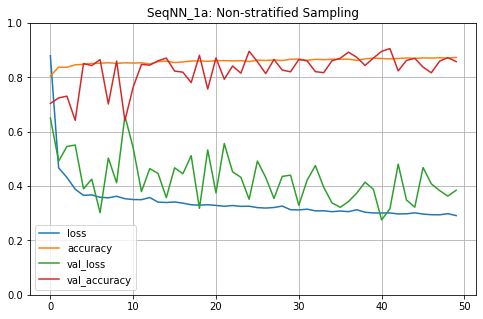

In [ ]:
#Plotting the evaluation graph
pd.DataFrame(SeqNN_1a.history).plot(figsize=(8, 5))
plt.title("SeqNN_1a: Non-stratified Sampling")
plt.grid(True)
plt.gca().set_ylim(0, 1)
#plt.savefig ('/content/drive/My Drive/Colab Notebooks/output.png')
plt.show()

The graph: Pretty well behaved

*Training Loss and Training Accuracy* : 
- The training accuracy is increasing and plateau at 0.9
- The training loss is going down to 0.3 (still high). *how to improve it?*

*Validation Loss and Validation Accuracy*
- both are unstable (not smooth), the huge spikes could be due to
> - sampling of validation data
> - large **learning rate**




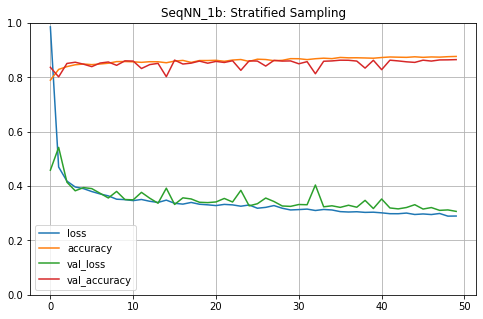

In [ ]:
#Plotting the evaluation graph
pd.DataFrame(SeqNN_1b.history).plot(figsize=(8, 5))
plt.title("SeqNN_1b: Stratified Sampling")
plt.grid(True)
plt.gca().set_ylim(0, 1)
#plt.savefig ('/content/drive/My Drive/Colab Notebooks/output.png')
plt.show()

The graph: Pretty well behaved

*Training Loss and Training Accuracy* : 
- The training accuracy is increasing and plateau at 0.9
- The training loss is going down to 0.3 (still high). *how to improve it?*

*Validation Loss and Validation Accuracy* are smoother compared to SeqNN_1a. 

Conclusion:  
> The sampling of validation data has significant impact on training of NN. 

**Keras Step 5 : Make Predictions**

***Sample Codes***

In [ ]:
# Getting the prediction probabilities based on test data
SeqNN1a_predProb_y_test = model1a.predict(X_test)
print('Probabilities:\n', SeqNN1a_predProb_y_test.round(2))

Probabilities:
 [[0.12 0.88]
 [0.07 0.93]
 [0.34 0.66]
 ...
 [0.95 0.05]
 [0.96 0.04]
 [1.   0.  ]]


In [ ]:
# Getting the predicted class
SeqNN1a_predClass_y_test = (SeqNN1a_predProb_y_test>0.5)
print('Predicted classes:\n', SeqNN1a_predClass_y_test)

Predicted classes:
 [[False  True]
 [False  True]
 [False  True]
 ...
 [ True False]
 [ True False]
 [ True False]]


In [ ]:
# Getting the indices of predicted class
SeqNN1a_pred_y_test = np.argmax(SeqNN1a_predClass_y_test, axis=1)
print(f"Predictions: {SeqNN1a_pred_y_test}")


Predictions: [1 1 1 ... 0 0 0]


***Make Predictions for Training Dataset***

In [ ]:
SeqNN1a_y_train_predProb = model1a.predict(X_train)
SeqNN1a_y_train_predClass = (SeqNN1a_y_train_predProb>0.5)
SeqNN1a_y_train_pred = np.argmax(SeqNN1a_y_train_predClass, axis=1)

***Make Predictions for Test Dataset***

In [ ]:
SeqNN1a_y_test_predProb = model1a.predict(X_test)
SeqNN1a_y_test_predClass = (SeqNN1a_y_test_predProb>0.5)
SeqNN1a_y_test_pred = np.argmax(SeqNN1a_y_test_predClass, axis=1)

**Repeat to Predict using Model_1b**

In [ ]:
#Make Predictions for Training Dataset
SeqNN1b_y_train_predProb = model1b.predict(X_train)
SeqNN1b_y_train_predClass = (SeqNN1b_y_train_predProb>0.5)
SeqNN1b_y_train_pred = np.argmax(SeqNN1b_y_train_predClass, axis=1)

#Make Predictions for Test Dataset
SeqNN1b_y_test_predProb = model1b.predict(X_test)
SeqNN1b_y_test_predClass = (SeqNN1b_y_test_predProb>0.5)
SeqNN1b_y_test_pred = np.argmax(SeqNN1b_y_test_predClass, axis=1)

## 3. Model Performance

In [ ]:
def model_performance(y_pred, y_pred_prob, y_actual):

  # Confusion Matrix Plot
  from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
  cm_array = confusion_matrix(y_actual, y_pred, labels=[0,1])
  cm = ConfusionMatrixDisplay(confusion_matrix=cm_array,display_labels=[0,1])
  cm.plot()

  # Confusion Matrix
  from sklearn.metrics import confusion_matrix
  print('Confusion matrix:\n', confusion_matrix(y_actual, y_pred))

  # Classification report
  from sklearn.metrics import classification_report
  print('\nClassification report:\n', classification_report(y_actual, y_pred, labels=[0,1]))

  # ROC AUC
  from sklearn.metrics import roc_auc_score
  auc = roc_auc_score(y_actual, y_pred_prob[:, 1])
  print('\nROC AUC:\n', auc)

  # Accuracy
  from sklearn.metrics import accuracy_score
  print('\nAccuracy:\n', accuracy_score(y_actual, y_pred))
  # Recall
  from sklearn.metrics import recall_score
  print('\nRecall:\n', recall_score(y_actual, y_pred))
  # Precision
  from sklearn.metrics import precision_score
  print('\nPrecision:\n', precision_score(y_actual, y_pred))
  # F1-score
  from sklearn.metrics import f1_score
  print('\nF1-score:\n', f1_score(y_actual, y_pred))

In [ ]:
# roc curve and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [ ]:
def roc_auc(y_pred_1, y_pred_prob_1, y_train, y_pred_2, y_pred_prob_2, y_test):
  # calculate scores
  null_probs = [0 for _ in range(len(y_train))]
  null_auc = roc_auc_score(y_train, null_probs)
  auc_1 = roc_auc_score(y_train, y_pred_prob_1[:, 1])
  auc_2 = roc_auc_score(y_test, y_pred_prob_2[:, 1])

  # summarize scores
  print('Null: ROC AUC=%.3f' % (null_auc))
  print('Training: ROC AUC=%.3f' % (auc_1))
  print('Test: ROC AUC=%.3f' % (auc_2))

  # calculate roc curves
  null_fpr, null_tpr, _ = roc_curve(y_train, null_probs)
  fpr_1, tpr_1, _ = roc_curve(y_train, y_pred_prob_1[:, 1])
  fpr_2, tpr_2, _ = roc_curve(y_test, y_pred_prob_2[:, 1])

  # plot the roc curve for the model
  pyplot.plot(null_fpr, null_tpr, linestyle='--')
  pyplot.plot(fpr_1, tpr_1, marker='.', label='Training')
  pyplot.plot(fpr_2, tpr_2, marker='.', label='Test')
  # axis labels
  pyplot.xlabel('False Positive Rate')
  pyplot.ylabel('True Positive Rate')
  # show the legend
  pyplot.legend()
  # show the plot
  pyplot.show()

***Evaluate Model Performance of Model1a***

Model:  SeqNN1a_train 

Confusion matrix:
 [[5967  684]
 [ 986 5663]]

Classification report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      6651
           1       0.89      0.85      0.87      6649

    accuracy                           0.87     13300
   macro avg       0.88      0.87      0.87     13300
weighted avg       0.88      0.87      0.87     13300


ROC AUC:
 0.9484259245503064

Accuracy:
 0.8744360902255639

Recall:
 0.8517070236125733

Precision:
 0.892232550811407

F1-score:
 0.8714989227454601


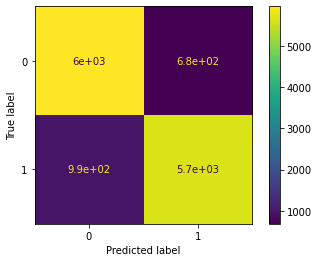

In [ ]:
print("Model: ", "SeqNN1a_train","\n")
model_performance(SeqNN1a_y_train_pred,SeqNN1a_y_train_predProb, y_train)

Model:  SeqNN1a_test 

Confusion matrix:
 [[1890  219]
 [  83  274]]

Classification report:
               precision    recall  f1-score   support

           0       0.96      0.90      0.93      2109
           1       0.56      0.77      0.64       357

    accuracy                           0.88      2466
   macro avg       0.76      0.83      0.79      2466
weighted avg       0.90      0.88      0.89      2466


ROC AUC:
 0.9103555125226952

Accuracy:
 0.8775344687753447

Recall:
 0.7675070028011205

Precision:
 0.5557809330628803

F1-score:
 0.6447058823529412


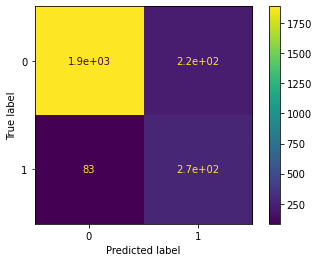

In [ ]:
print("Model: ", "SeqNN1a_test","\n")
model_performance(SeqNN1a_y_test_pred,SeqNN1a_y_test_predProb, y_test)

Model:  SeqNN1a
Null: ROC AUC=0.500
Training: ROC AUC=0.948
Test: ROC AUC=0.910


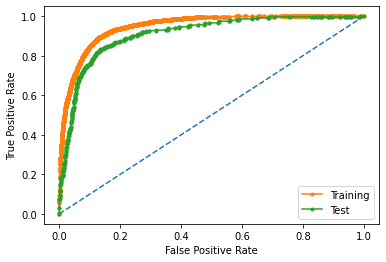

In [ ]:
print("Model: ", "SeqNN1a")
roc_auc(SeqNN1a_y_train_pred, SeqNN1a_y_train_predProb, y_train, SeqNN1a_y_test_pred, SeqNN1a_y_test_predProb, y_test)

***Evaluate Model Performance of Model1b***

Model:  SeqNN1b_train 

Confusion matrix:
 [[5768  883]
 [ 697 5952]]

Classification report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88      6651
           1       0.87      0.90      0.88      6649

    accuracy                           0.88     13300
   macro avg       0.88      0.88      0.88     13300
weighted avg       0.88      0.88      0.88     13300


ROC AUC:
 0.9507349301992183

Accuracy:
 0.881203007518797

Recall:
 0.895172206346819

Precision:
 0.8708119970738845

F1-score:
 0.8828240878077722


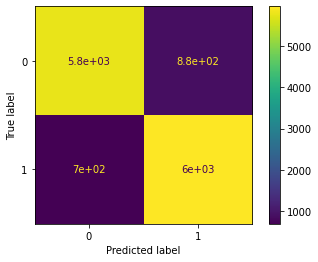

In [ ]:
print("Model: ", "SeqNN1b_train","\n")
model_performance(SeqNN1b_y_train_pred,SeqNN1b_y_train_predProb, y_train)

Model:  SeqNN1b_test 

Confusion matrix:
 [[1836  273]
 [  70  287]]

Classification report:
               precision    recall  f1-score   support

           0       0.96      0.87      0.91      2109
           1       0.51      0.80      0.63       357

    accuracy                           0.86      2466
   macro avg       0.74      0.84      0.77      2466
weighted avg       0.90      0.86      0.87      2466


ROC AUC:
 0.9053363403208603

Accuracy:
 0.8609083536090836

Recall:
 0.803921568627451

Precision:
 0.5125

F1-score:
 0.6259541984732824


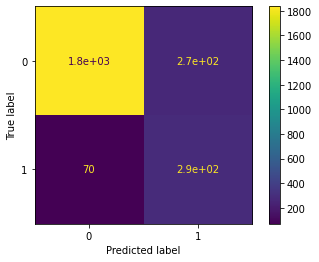

In [ ]:
print("Model: ", "SeqNN1b_test","\n")
model_performance(SeqNN1b_y_test_pred,SeqNN1b_y_test_predProb, y_test)

Model:  SeqNN1b
Null: ROC AUC=0.500
Training: ROC AUC=0.951
Test: ROC AUC=0.905


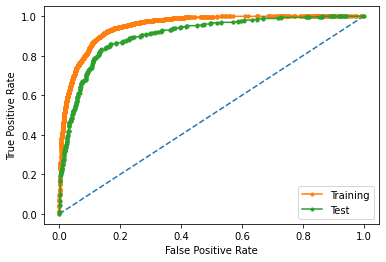

In [ ]:
print("Model: ", "SeqNN1b")
roc_auc(SeqNN1b_y_train_pred, SeqNN1b_y_train_predProb, y_train, SeqNN1b_y_test_pred, SeqNN1b_y_test_predProb, y_test)